# State College Data Crawl
Hosted by Nittany Data Labs

## Background
As we all know State College, PA is a college town. We wanted to take a look at the bars downtown.

Here's our assumptions when determining the bars to include:
* The Tavern (40.7956, -77.8597) represents what we are considering to be the center of downtown
* We included all bars within 0.7 km of the center location
* The location must have the tag of "bar" on Google Maps, as of September 18th

To see how we scraped the data from Google Maps, check out on [Github](https://github.com/Nittany-Data-Labs/Data-Crawl/blob/main/DataCrawl_Data.ipynb)

# Packages

In [ ]:
!pip install geopandas
!pip install chart-studio

In [ ]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
import matplotlib.pyplot as plt

import chart_studio
import chart_studio.plotly as py
import plotly.figure_factory as ff
import chart_studio.tools as tl
import plotly.graph_objs as go

## Import Data
Note: when importing data from GitHub as a url, make sure you select "Raw" before copying the URL



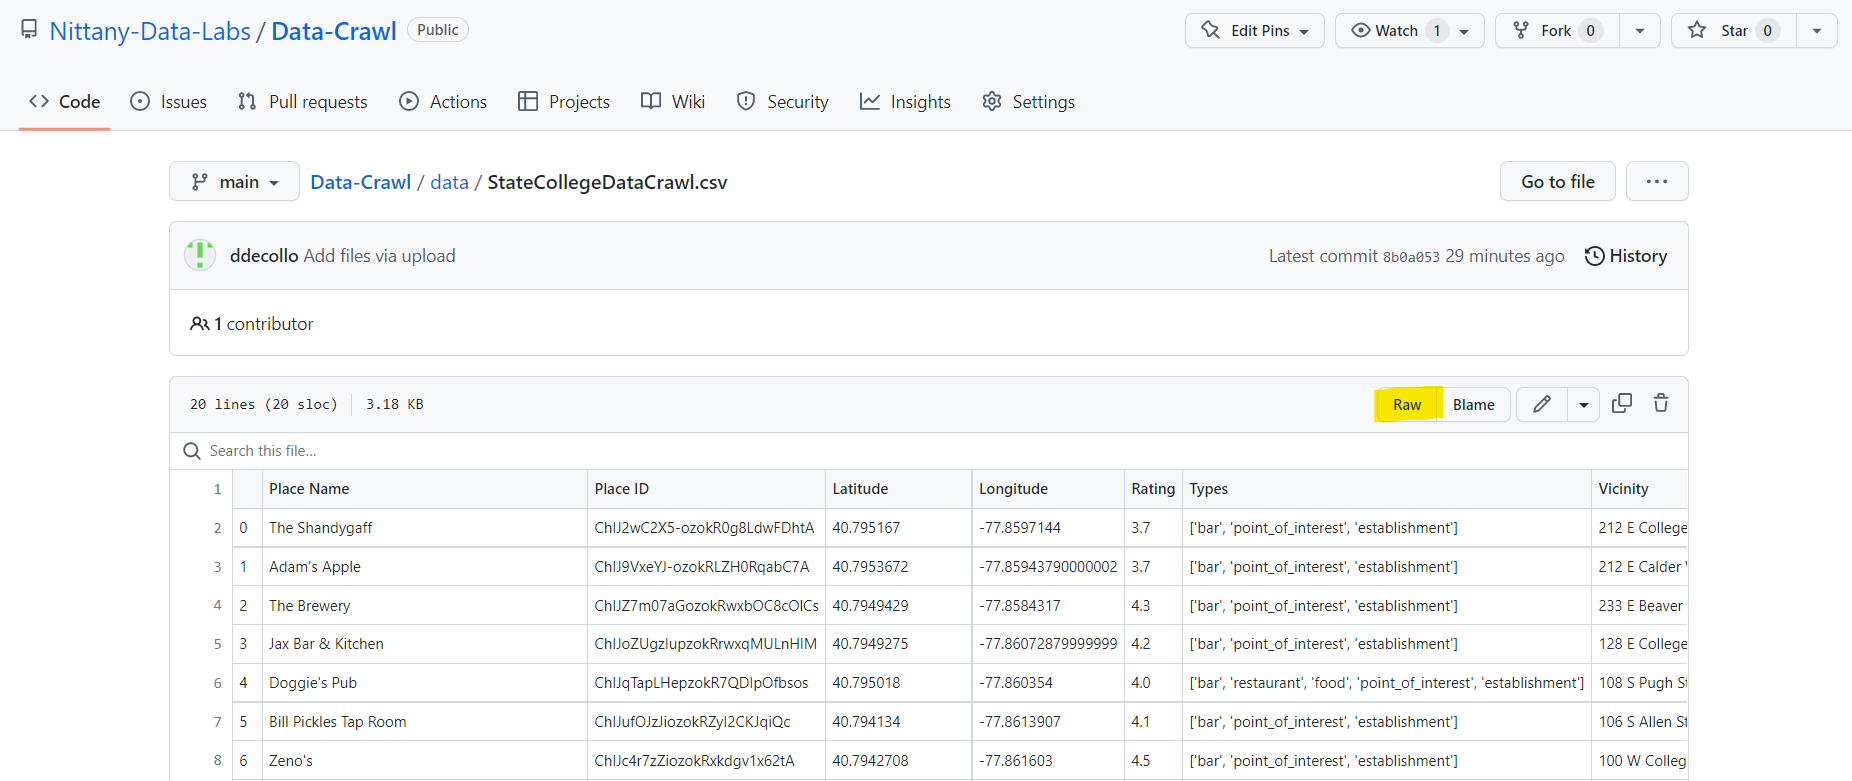

In [ ]:
#import from NDL's github
distance_matrix = pd.read_csv('https://raw.githubusercontent.com/Nittany-Data-Labs/Data-Crawl/main/data/DataCrawlDistanceMatrix.csv', header=1, index_col=0)
bar_general = pd.read_csv('https://raw.githubusercontent.com/Nittany-Data-Labs/Data-Crawl/main/data/StateCollegeDataCrawl.csv', index_col=0)

In [ ]:
#add coordinates column to bar_general for mapping
bar_general['coordinates'] = list(zip(bar_general['Longitude'], bar_general['Latitude']))
bar_general['coordinates'] = bar_general['coordinates'].apply(Point)

## Understanding the Data
In general you should be asking:
* What is the size of my dataset(s)?
* What type of data am I working with?
* How do my datasets relate to eachother?
* Do I need to clean my data?

In [ ]:
# summarize and explore the data here:

## Map your data points
Create a map to help visualize the locations you're working with

[Tutorial](https://github.com/Nittany-Data-Labs/Data-Crawl/blob/main/StateCollegeMap.ipynb)

In [ ]:
#geo dataframe can also be used
gdf = gpd.GeoDataFrame(bar_general, geometry="coordinates")

In [ ]:
# Change API key for Plotly
def map_credentials():
  # Change API key for Plotly
  tl.set_credentials_file(username='',      #Insert Plot.ly username <-----------
                          api_key='')       #Insert Plot.ly api key <-----------

  # Add Mapbox access token here
  mapbox_access_token = 'pk.eyJ1IjoiYW1pc2g0MTAyIiwiYSI6ImNsbmh4d3dubzE1NGMybWxlYmFocnhkc2IifQ.WjUkx_Az9w81aDVxj4d0MQ'      #Insert Mapbox Default public token <-----------

  return tl.set_credentials_file, mapbox_access_token

In [ ]:
def create_map(site_lat, site_lon, locations_name):
  #get credentials
  tl.set_credentials_file, mapbox_access_token = map_credentials()

  # Generate the data for the map
  data = [
      go.Scattermapbox(
          lat=site_lat,
          lon=site_lon,
          mode='markers',
          marker=dict(
              size=8,
              color='rgb(255, 0, 0)',
              opacity=1.0
          ),
          hovertext = locations_name
      )]

  layout = go.Layout(
      title='State College Bars',
      autosize=True,
      hovermode='closest',
      showlegend=False,
      mapbox=dict(
          accesstoken=mapbox_access_token,
          bearing=0,
          center=dict(
              lat=40.7956,
              lon=-77.8597
          ),
          pitch=0,
          zoom=15,
          style='dark'
      ),
  )

  fig = dict(data=data, layout=layout)
  return py.iplot(fig, filename='State College Bars')

#put lat, lon, and name into function
create_map(bar_general.Latitude, bar_general.Longitude , bar_general['Place Name'])

# Challenge 1 - Exploring the Streets:
Take a look at the streets included in our datasets, for example E College Ave, S Pugh St, etc.
   
Create a dataframe with:
* street name
* number of bars for each street
* sum of bar rating for the street
* average bar rating for the street

### Get Street Name
Use the split function to remove the city and street number.
1.   Split at comma:

 Example:
 * '212 E College Ave, State College' -> ['212 E College Ave', 'State College']
2.   Look at the first element in the list with List[0]
3. Split that element at the spaces

 Example:
 * '212 E College Ave' -> ['212', 'E', 'College', 'Ave']
4. Combine all non-numeric items with a space inbetween each element as a string

 Example:
 * ['212', 'E', 'College', 'Ave'] -> 'E College Ave'
5. Add the results to a list
6. Create a column named 'Street' in our existing dataframe with our list


 **Will this work for locations that are not in State College?**

In [ ]:
streets = []                          #empty list
for i in bar_general['Vicinity']:
  street_split = i.split(',')         #split by comma
  street_num = street_split[0]        #the city is removed
  temp = street_num.split()           #split by space
  streets.append(' '.join(x for x in temp if not x.isdigit()) )   #join with a space if it is not a number
bar_general['Street'] = streets       #add street column to df
bar_general                           #the new column is the last column in the df

### Groupby and Aggregation
[Helpful Guide](https://pbpython.com/groupby-agg.html)

In [ ]:
street_df = bar_general.groupby('Street')['Rating'].agg('describe')
#print(street_df)                 #print this to find out what's included in agg('describe')
street_df = street_df[['count', 'mean', 'min', 'max']]              #only keep these 4 columns
street_df['total'] = street_df['count'] * street_df['mean']         #add new column

In [ ]:
#sort df
street_df = street_df.sort_values('count')
street_df

,count,mean,min,max,total
Street,,,,,
E Calder Way,1.0,3.700,3.7,3.7,3.7
S Pugh St,1.0,4.000,4.0,4.0,4.0
Hiester St,2.0,3.700,3.3,4.1,7.4
S Allen St,2.0,4.150,4.1,4.2,8.3
E College Ave,4.0,4.000,3.7,4.2,16.0
W College Ave,4.0,4.125,3.7,4.5,16.5
E Beaver Ave,5.0,4.280,3.9,4.4,21.4


## Visual
Create a visual that you feel best represents the streets dataframe you

### State College Bar Chart

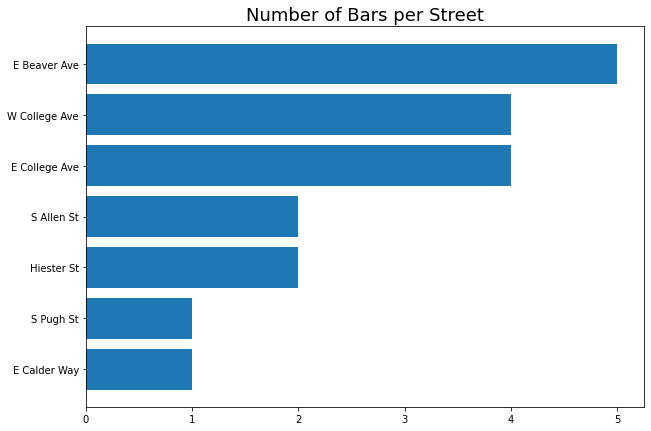

In [ ]:
# Figure Size
fig = plt.figure(figsize =(10, 7))

# Horizontal Bar Plot
#plt.barh(street_df.index, street_df['count'])
plt.barh(street_df.index, 'count', data = street_df)

#add title
plt.title("Number of Bars per Street", size=18)

# Show Plot
plt.show()

#save image
#plt.savefig("StateCollegeBarChart.png")

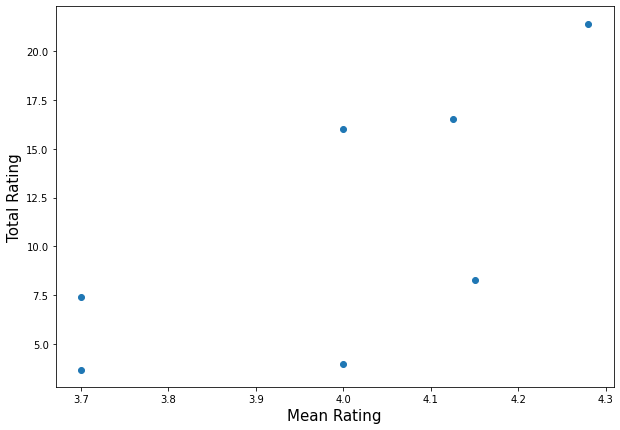

In [ ]:
# Figure Size
fig = plt.figure(figsize =(10, 7))

# Horizontal Bar Plot
plt.scatter(street_df['mean'], street_df['total'])

#axis label
plt.xlabel("Mean Rating", size=15)
plt.ylabel("Total Rating", size=15)

# Show Plot
plt.show()

# Challenge 2 - Bar Crawl:
After a long week you and your friends do not want to walk further than neccessary. What is the most efficient path for you to visit all of the bars in downtown State College?

**Hint**: Think of this problem from a different perspective.
You are a **[TRAVELING SALESMAN](https://developers.google.com/optimization/routing/tsp)** trying to sell paper products to all of the bars in State College. What is your most efficient path to get to all of the bars in downtown State College?

[Source](https://github.com/fillipe-gsm/python-tsp)

## Distance Matrix
Need to clean up original distance matrix so it is functional

In [ ]:
bar_names = list(bar_general['Place Name'])

dis_matrix = []       #create distance matrix
bars_distance = {}    #create dictionary with distances

for i in bar_names:
  list1 = []
  for j in distance_matrix[i]:
    list1.append(j)
  dis_matrix.append(list1)
  bars_distance[i] = list1

dis_matrix = np.array(dis_matrix)

## TSP

In [ ]:
#basic TSP (return to start)
permutation, distance = solve_tsp_dynamic_programming(dis_matrix)
print(permutation, distance)

#convert column numbers to their names
order = []
for i in permutation:
  order.append(bar_names[i])

if len(order) == len(bar_names):
  print(order, distance)
else:
  print("Failed")

[0, 1, 10, 13, 15, 14, 2, 16, 7, 8, 11, 9, 5, 17, 6, 18, 12, 4, 3] 1552
['The Shandygaff', "Adam's Apple", 'The Tavern', 'Alla Spina at HiWay', 'The Saloon', 'Primanti Bros. Restaurant and Bar State College', 'The Brewery', 'Social Food + Drink', 'Local Whiskey', 'Phyrst', 'Central Reservation', 'Champs Downtown', 'Bill Pickles Tap Room', 'The Corner Room', "Zeno's", 'Allen Street Grill', "Chumley's", "Doggie's Pub", 'Jax Bar & Kitchen'] 1552


## Open TSP
Unlike TSP, Open TSP does not have to return to the start. This is the type of path you would use for a bar crawl. TSP is like a round-trip travel plan and Open TSP is like a one-way travel plan.

In [ ]:
#open TSP (does not return to start)
dis_matrix[:, 0] = 0
permutation2, open_distance = solve_tsp_dynamic_programming(dis_matrix)
print(permutation2)

#convert column numbers to their names
open_order = []
for i in permutation2:
  open_order.append(bar_names[i])

if len(open_order) == len(bar_names):
  print(open_order, open_distance)       #distance is in meters
else:
  print("Failed")

[0, 1, 10, 3, 4, 12, 18, 6, 17, 5, 9, 11, 8, 7, 16, 2, 14, 15, 13]
['The Shandygaff', "Adam's Apple", 'The Tavern', 'Jax Bar & Kitchen', "Doggie's Pub", "Chumley's", 'Allen Street Grill', "Zeno's", 'The Corner Room', 'Bill Pickles Tap Room', 'Champs Downtown', 'Central Reservation', 'Phyrst', 'Local Whiskey', 'Social Food + Drink', 'The Brewery', 'Primanti Bros. Restaurant and Bar State College', 'The Saloon', 'Alla Spina at HiWay'] 1266


## Visual
Create a map of the best path

### Sort Dataframe
First we have to put our df in the correct order.

In [ ]:
def create_tsp_df(order, bar_general = bar_general):
  tsp_df = bar_general[['Place Name','Latitude', 'Longitude']]
  temp = pd.DataFrame({'Place Name':order, 'order':range(0, len(order))})

  tsp_df = pd.merge(tsp_df, temp, on='Place Name')
  #sort df by order and reindex so the values match order
  tsp_df = tsp_df.sort_values('order').reset_index(drop=True)
  return tsp_df
  #temp

tsp_df = create_tsp_df(order)
tsp_df
open_tsp_df = create_tsp_df(open_order)
open_tsp_df

,Place Name,Latitude,Longitude,order
0,The Shandygaff,40.795167,-77.859714,0
1,Adam's Apple,40.795367,-77.859438,1
2,The Tavern,40.795630,-77.859778,2
3,Jax Bar & Kitchen,40.794928,-77.860729,3
4,Doggie's Pub,40.795018,-77.860354,4
5,Chumley's,40.794120,-77.861807,5
6,Allen Street Grill,40.794116,-77.861581,6
7,Zeno's,40.794271,-77.861603,7
8,The Corner Room,40.794272,-77.861607,8
9,Bill Pickles Tap Room,40.794134,-77.861391,9


### Create TSP Map function

In [ ]:
def tsp_map(order, bar_general = bar_general):
  #get credentials
  tl.set_credentials_file, mapbox_access_token = map_credentials()

  #get tsp dataframe
  tsp_df = create_tsp_df(order, bar_general = bar_general)

  # Save latitude and longitude as variables.
  site_lat = tsp_df.Latitude
  site_lon = tsp_df.Longitude
  locations_name = tsp_df['Place Name']
  order_lst = tsp_df['order']

  # Generate the data for the map
  data = [
      go.Scattermapbox(
          lat=site_lat,
          lon=site_lon,
          mode='markers+lines',
          marker=dict(
              size=8,
              #color='rgb(242, 177, 172)',
              opacity=0.8,
              color = order_lst
          ),
          hovertext = locations_name
      )]


  layout = go.Layout(
      title='State College Bars',
      autosize=True,
      hovermode='closest',
      showlegend=False,
      mapbox=dict(
          accesstoken=mapbox_access_token,
          bearing=0,
          center=dict(
              lat=40.7956,
              lon=-77.8597
          ),
          pitch=0,
          zoom=15,
          style='light'
      ),
  )

  fig = dict(data=data, layout=layout)
  return py.iplot(fig, filename='State College Bars - Open TSP')

### TSP MAP

In [ ]:
tsp_map(order)

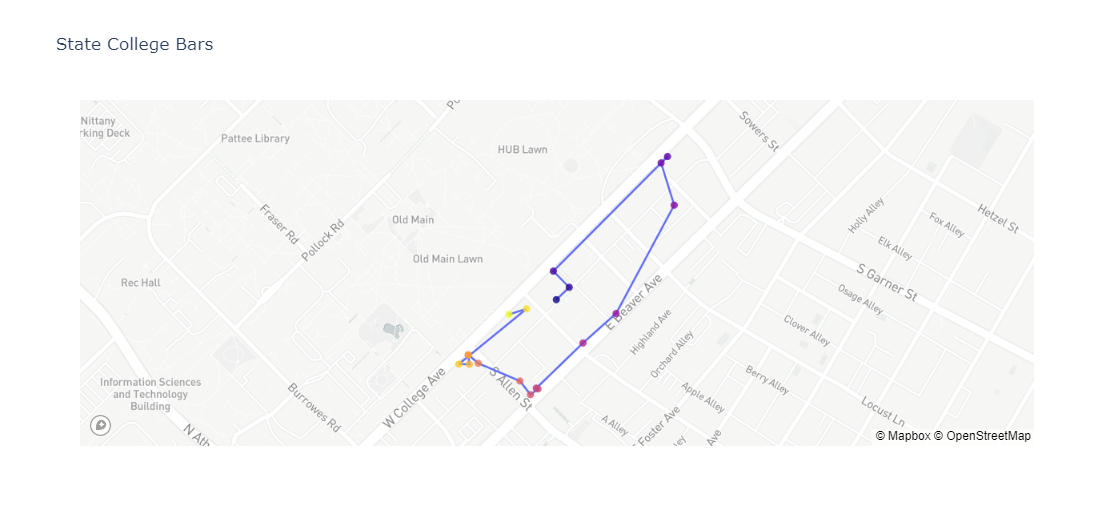

### Open TSP Map

In [ ]:
tsp_map(open_order)

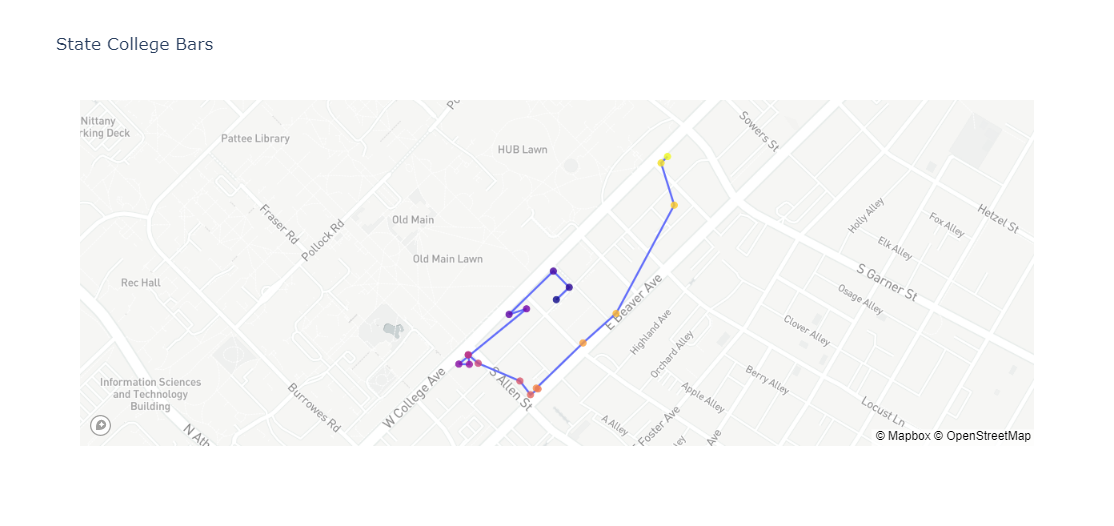

## Summary
* It is less than a mile to walk to all of the bars in State College. TSP results in a 1552 meter path. Open TSP results in a 1266 meter path

* Open TSP would be the more realistic option. Most people do not return to the starting bar for a bar crawl.

# Challenge 3 - Time to Eat
Create a new dataframe that only includes restaurants. For this challenge the Types column in bar_general **MUST** include the tag 'restaurant'.


In [ ]:
# create new dataframe

## Number of Restaurants
How many of our original bars are also considered restaurants?

## Repeat
Redo either challenge 1 or challenge 2, but this time only include the locations found  in the restaurants dataframe.

If you're redoing Challenge 1, include all of the streets found in the original dataset. If a street does not have a bar that is considered a restraunt, put a 0.

## Visual
Create a visual of your choice. The visual should go along with the story you're trying to tell in this challenge.